
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Objective Function: $$ Z = 30NT + 100PT + 30NTr + 80PTr $$
Constraints:
- Metal usage constraint: $$ 40NT + 40PT + 30NTr + 30PTr \leq 40000 $$
- Labor usage constraint: $$ 2NT + 5PT + 2NTr + 4PTr \leq 6000 $$
- Non-negativity constraint: $$ NT, PT, NTr, PTr \geq 0 $$

In [91]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone (NT)
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone (PT)
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet (NTr)
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet (PTr)

# Objective function
main_model += 30*x1 + 100*x2 + 30*x3 + 80*x4, "Profit"

# Constraints
# 1. Total metal sheet used
main_model += 40*x1 + 40*x2 + 30*x3 + 30*x4 <= 40000, "Metal Sheet Constraint"

# 2. Total skilled labor hours used
main_model += 2*x1 + 5*x2 + 2*x3 + 4*x4 <= 6000, "Skilled Labor Constraint"

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $106666.67

In [19]:
# Solve the problem
main_model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/cherrypham/Downloads/STAPLES/CODE/advanced-algorithms-2025-01/lab-assignments/01-linear-programming/venv/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/b82cfb25bd3942f9a1767d828ed20a7f-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/tv/r11p_97n1pj07q4jqfpjv5440000gn/T/b82cfb25bd3942f9a1767d828ed20a7f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 20 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 2 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 4 (0) columns and 8 (0) elements
0  Obj -0 Dual inf 270 (4)
0  Obj -0 Dual inf 270 (4)
1  Obj 106666.67
Optimal - objective value 106666.67
Optimal objective 106666.6667 - 1 iterations time 0.002
Option for

1

## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| x1 | 0 |
| x2 | 0 |
| x3 | 0 |
| x4 | 1333.333 |

In [20]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 0.0
x3 0.0
x4 1333.3333


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:

The allowable increase in the profit coefficient is approximately $50. This means:

- Current selling price: $60 (profit = $30)
- Maximum price before basis change: $110 (profit = $80)
- At this point, novice trumpets become equally attractive as professional trumpets

In [21]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=60, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 60, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 65, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x3: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 80, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 85, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
As you can see from the output right above, as x3's coefficient's value reaches 80 (price - material), it is more profitable to produce novice trumpets if they are sold for the same amount as professional trumpets. In a logical sense, this is understandable since it takes less time for novice trumpets to be made compared to professional ones while material for novice trumpets cost the same as professional ones. Thus, if novice and professional trumpets make the same profit per sale, it is more profitable to sell novice ones since more of them can be made with the same amount of time. 

## 2c) (1 point)
What would change if the price went down?

### Solution:
Maximum profit and most profitable product to make would stay the same (to be professional trumpets) because lowering the price of novice trumpets would only make them less profitable and less desirable to make. In addition, the algorithm determines that it's most profitable to only produce professional trumpets so lowering the price of novice woudl not change anything, especially since the objective function does not consider demand.

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
The price increase of novice quality trombones does not influence the most profitable product to make unless that price is increased by $77 to $107.

In [23]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=30, step=1, max_iter=100, verbose=True)

print(f"The allowable increase for x1 is: {allowable_increase}")

/Users/cherrypham/Downloads/STAPLES/CODE/advanced-algorithms-2025-01/lab-assignments/01-linear-programming/venv/lib/python3.9/site-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Iteration 1: Coefficient of x1: 30, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x1: 31, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x1: 32, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x1: 33, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x1: 34, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x1: 35, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:

Same deal as above. If novice and professional trombones make the same profit per sale, it is more profitable to sell novice ones since more of them can be made with the same amount of time. 

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:

If such price change happens, the optimal profit would be less since we loss the top yielding product. The new top yielding product is professional trombones, with a profit of $100 per sale. This is $20 per sale more than professional trumpets; however, it takes 5 hours to produce a professional trombone as opposed to 4 hours to produce a professional trumpet. Ultimately, with the 6000 hours given, it would have been more profitable to produce professional trumpets if they yield $80 per sale, but not when they yield $70 per sale. In conclusion, if the price of professional quality trumpets fell to $100 per sale, the production plan would change to solely producing professional trombones for the optimal profit to be $100,000.

In [ ]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Re-define Objective function
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Constraints
low_trumpet_model += 30*x1 + 100*x2 + 30*x3 + 70*x4, "Profit"
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:
- Upper Bound: $45000
```
Total Profit: $120000.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1500.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -45000, slack = -0.0
  Skilled_Labor_Constraint: RHS = -6000, slack = -0.0
```
- Lower Bound: $0
```
Total Profit: $0.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 0.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = 10, slack = 0.0
  Skilled_Labor_Constraint: RHS = -6000, slack = 6000.0
```

In [ ]:
rhs_tol_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
rhs_tol_model.constraints["Metal_Sheet_Constraint"].changeRHS(40000)  # TODO: Change this value

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
rhs_tol_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[rhs_tol_model.status]}")

# Print updated results
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0
  Skilled_Labor_Constraint: RHS = -6000, slack = 666.6666999999998
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $0.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 0.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = 0, slack = -0.0
  Skilled_Labor_Constraint: RHS = -6000, slack = 6000.0


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:

1. A shadow price represents how much our objective function or profit would increase if we got one more unit of the resource. For the metal sheet constraint, the shadow price tells us how much additional profit we could make if we had one more square inch of metal available.

2. If we were to add 500 square inches, with the shadow price of metal being 1 dollar/square inch:
$$ \Delta profit = 500 \cdot 2.6666667 \approx \$1333.33335$$

In [89]:
shadow_model = copy.deepcopy(main_model)

# Solve LP model with original RHS
shadow_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[shadow_model.status]}")

old_profit = shadow_model.objective.value()
# Print old results
print(f"Total Profit: ${shadow_model.objective.value():.2f}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check shadow value
for name, constraint in shadow_model.constraints.items():
    print(f"{name}: RHS = {constraint.constant}, shadow value = {constraint.pi}")
    break

# Update RHS
metal_shadow_price = shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(40500)

print("---------------------------------------------")
print("After Increasing Metal Supply:")
shadow_model.solve(PULP_CBC_CMD(msg=0))

# Display the new results
print("\nNew Results with Increased Metal Supply:")
print(f"New Profit: ${shadow_model.objective.value():.2f}, change: ${shadow_model.objective.value() - old_profit:.2f}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

Model Solution Status: Optimal
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333
Metal_Sheet_Constraint: RHS = -40000, shadow value = 2.6666667
---------------------------------------------
After Increasing Metal Supply:

New Results with Increased Metal Supply:
New Profit: $108000.00, change: $1333.34
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1350.0


# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

HINT: What is the slack?

ANSWER: 666.6666999999998 skilled labor hour is unused

In [96]:
labor_model = copy.deepcopy(main_model)

# Solve LP model with original RHS
labor_model.solve(PULP_CBC_CMD(msg=0))
print(f"Slack for Skilled Labor Constraint: {labor_model.constraints['Skilled_Labor_Constraint'].slack}")


Slack for Skilled Labor Constraint: 666.6666999999998


## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:

Our objective function already reached optimal profit with labor slack of almost 667 hours. It is wise not to pay any additional laborer.

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

### Solution:

If such events happen, the overall profit would decrease becuase we can produce fewer professional instruments with the same labor, or this chnage from industrial regulation might make professional instruments relatively less attractive to produce and we might need to shift to less profitable novice instruments.

# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:
Marginal cost of metal for tuba: $$ \text{marginal cost of metal}_{tuba} = 50 \cdot \$2.6666667 \approx \$133 $$

The high shadow prices tell us our current resources are being used very efficiently to produce other instruments. Each square inch of metal generates $2.66 in profit in current production. Before tuba, we had a lot of slack in our labor hour constraint. The tuba uses large amounts of both resources (50 sq inches and 250 hours) and also brings back a lot of profit ($200). The opportunity cost is very high because we'd have to divert metal resources from more profitable uses. However, it's worth considering that we have a lot of unused labor hour. The fact that tubas are included in the solution below suggests that the profit they generate outweighs the opportunity cost of the metal they consume, making the value they add to the objective function is still positive. Thus, despite for competing for metal resources with professional trumpets, tubas are included in the production plan because they make good use of otherwise unused labor. The trade-off between using metal for professional trumpets vs. tubas is optimal given the available resources as we can see from the 0 slack presented below from the solver.

In [104]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# Define the problem and analyze the shadow prices
# Objective function
tuba_model += 30*x1 + 100*x2 + 30*x3 + 80*x4 + 150*x5, "Profit"

# Constraints
# 1. Total metal sheet used
tuba_model += 40*x1 + 40*x2 + 30*x3 + 30*x4 + 50*x5 <= 40000, "Metal Sheet Constraint"

# 2. Total skilled labor hours used
tuba_model += 2*x1 + 5*x2 + 2*x3 + 4*x4 +250*x5 <= 6000, "Skilled Labor Constraint"

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)
# Solve the problem
tuba_model.solve(PULP_CBC_CMD(msg=0))
# Display results
print(f"Objective value (Profit): {tuba_model.objective.value()}")
for var in tuba_model.variables():
    print(var.name, var.value())
# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in tuba_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}, shadow value = {constraint.pi}")

Objective value (Profit): 106712.3269
x1 0.0
x2 0.0
x3 0.0
x4 1328.7671
x5 2.739726

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0, shadow value = 2.6575342
  Skilled_Labor_Constraint: RHS = -6000, slack = -0.0, shadow value = 0.068493151


## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:

The metal constraint was already binding in the above solution. This means that every additional unit of metal allocated to tubas must come at the expense of professional trumpets. Now given that they sell for less, they would be less desirable to produce. We can verify it from the model result below.

In [106]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model2 = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# Define the problem and analyze the shadow prices
# Objective function
tuba_model2 += 30*x1 + 100*x2 + 30*x3 + 80*x4 + 50*x5, "Profit"

# Constraints
# 1. Total metal sheet used
tuba_model2 += 40*x1 + 40*x2 + 30*x3 + 30*x4 + 50*x5 <= 40000, "Metal Sheet Constraint"

# 2. Total skilled labor hours used
tuba_model2 += 2*x1 + 5*x2 + 2*x3 + 4*x4 +250*x5 <= 6000, "Skilled Labor Constraint"

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)
# Solve the problem
tuba_model2.solve(PULP_CBC_CMD(msg=0))
# Display results
print(f"Objective value (Profit): {tuba_model2.objective.value()}")
for var in tuba_model2.variables():
    print(var.name, var.value())
# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in tuba_model2.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}, shadow value = {constraint.pi}")

Objective value (Profit): 106666.664
x1 0.0
x2 0.0
x3 0.0
x4 1333.3333
x5 0.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0, shadow value = 2.6666667
  Skilled_Labor_Constraint: RHS = -6000, slack = 666.6666999999998, shadow value = -0.0


# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

Objective Function: $$ W = 40,000SM + 6,000LH$$
Constraints:
- Novice Trombone: $$40SM + 2LH \ge 30$$
- Professional Trombone: $$40SM + 5LH \ge 100$$
- Novice Trumpet: $$30SM + 2LH \ge 30$$
- Professional Trumpet: $$30SM + 4LH \ge 80$$
- Non-negativity constraints: $$ SM, LH \geq 0 $$

In [4]:
from pulp import LpMinimize, LpProblem, LpVariable, PULP_CBC_CMD

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# Define variables
y1 = LpVariable(name="y1", lowBound=0)  # Sheet Metal (SM)
y2 = LpVariable(name="y2", lowBound=0)  # Labor Hour (LH)

# Objective function
dual_model += 40000*y1 + 6000*y2, "Cost"

# Constraints
dual_model += 40*y1 + 2*y2 >= 30, "Novice Trombone Constraint"
dual_model += 40*y1 + 5*y2 >= 100, "Professional Trombone Constraint"
dual_model += 30*y1 + 2*y2 >= 30, "Novice Trumpet Constraint"
dual_model += 30*y1 + 4*y2 >= 80, "Professional Trumpet Constraint"

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

In [5]:
# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


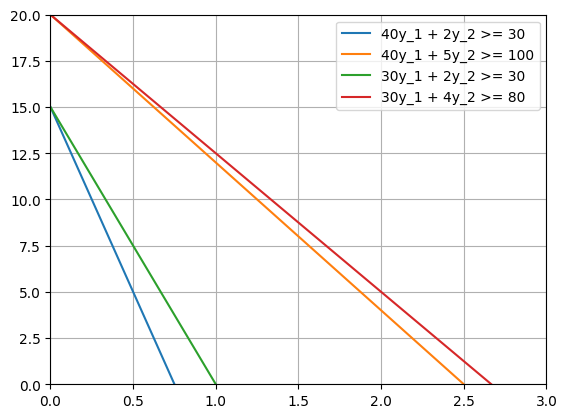

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot constraint lines
y = np.arange(0, 4)
plt.plot(y, ((30 - 40 * y) / 2), label="40y_1 + 2y_2 >= 30")
plt.plot(y, ((100 - 40 * y) / 5), label="40y_1 + 5y_2 >= 100")
plt.plot(y, ((30 - 30 * y) / 2), label="30y_1 + 2y_2 >= 30")
plt.plot(y, ((80 - 30 * y) / 4), label="30y_1 + 4y_2 >= 80")

plt.axis([0, 3, 0, 20])
plt.grid(True)
plt.legend()
plt.show()

## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:

The Duality Theorem implies a relationship between the primal and dual that is known as complementary slackness, which is the relationship between the slackness in a primal constraint and the slackness of the associated dual variable.
- If a primal constraint is non-binding (there is slack), then its corresponding dual variable must be zero.
- If a primal constraint is binding (it is tight), then the corresponding dual variable must be positive.

In our original scenario, the metal sheet constraint has zero slack, meaning it is fully utilized and binding. This implies that the corresponding dual variable is positive, indicating that increasing the available metal would increase profit. The skilled labor constraint has a positive slack of 666.67 hours, meaning that not all available labor is being used. This suggests that the corresponding dual variable is zero, meaning increasing available skilled labor would not improve profitability.

